# Application in General Relativity: M-R solving TOV equations for spherical stars 

by Argyro Sasli @28/05/2022

In [1]:
#load
import numpy as np  
import math
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from IPython.display import display, Math, Latex
##warnings odeint()
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

**The Tolman-Oppenheimer-Volkoff system** in units $c=G=1$ is
$$ P = P(\epsilon),$$


$$ \frac{dP}{dr} = -\frac{(\epsilon+P)(m+4\pi r^3P)}{r(r-2m)},$$


$$ \frac{dm}{dr} = 4\pi r^2 \epsilon$$

m reminds us the Newtonian mass.

$$ \frac{d\nu}{dr} = -\frac{2}{\epsilon+P}\frac{dP}{dr}=\frac{2(m+4\pi r^3P)}{r(r-2m)},$$

which looks like the expression for the Newtonian potential with some additional terms that look like corrections to the gravitational mass and the radial distance. In fact at the weak field limit, the Newtonian potential is $\Phi=\nu/2$. 


$$ \lambda = -\ln\left(1-\frac{2m}{r}\right),$$
 

### Initial Condintions
We now have the full system of equations, which we can close with the choice of an EoS $ P = P(\epsilon)$. The system is supplemented by a set of initial conditions at the center of the star,

$$ P(0) = P_c,$$
or
$$ \epsilon(0) = \epsilon_c,$$
$$ m(0) = 0,$$
$$ \nu(0) = -1.$$

where the last choice is arbitrary (after the interior solution is obtained, $\nu$ will be shifted to match the Schwarzschild exterior solution at the surface).

Near the center, a series expansion gives for the behaviour of the various quantities,

$$P(r) \simeq P_c -(2\pi)(\epsilon_c+P_c) \left( P_c+\frac{1}{3}\epsilon_c \right) r^2 + O(r^4),$$
$$ m(r) \simeq \frac{4}{3}\pi\epsilon_c r^3 + O(r^4),$$
$$ \nu(r) \simeq \nu_c + 4\pi \left(P_c+ \frac{1}{3}\epsilon_c \right)r^2 + O(r^4).$$

On the other hand, the value of $\nu$ at the surface is 

$$ \nu_\star = -\lambda_\star = \ln\left(1-\frac{2M}{R}\right).$$

Furthermore, the gravitational mass can be obtained as 

$$ M = \int_0^R 4\pi r^2\epsilon dr,$$
or as
$$ M = \int_0^R 4\pi r^2 e^{(\nu+\lambda)/2}(\epsilon +3P)dr,$$

while the baryon mass of the star is

$$ M_0 = \int_0^R 4\pi r^2 e^{\lambda/2}\rho dr. $$

## Polytropic Equation
The polytropic equation of state is
$$P = K\rho^\Gamma,$$
Integrating the first law of thermodynamics for barotropic fluids
$$ d\frac{\epsilon}{\rho} = - P d\frac{1}{\rho}$$
yields 
$$ \epsilon = \rho + \frac{P}{\Gamma-1}$$

In [2]:
#Tolmann-Oppenheimer-Volkhoff equations
def TOV(y, r,Gamma,K):
    m = y[0] # mass
    P = y[1] # pressure
    
    #P=Krho^\Gamma
    #ene=rho+P/(\Gamma-1)
    ene = (P/K)**(1./Gamma) + P/(Gamma-1.)
    
    #dm,dP
    return (4*np.pi*ene*r**2, \
           -(ene+P)*(m + 4*np.pi*r**3*P)/(r*(r-2*m)))

#numerical solution of TOV
def TOVsol(rmax,Pc,K,Gamma):
    r= np.linspace(0,rmax,1001)
    dr=r[1]-r[0]
    enec = (Pc/K)**(1./Gamma) + Pc/(Gamma-1.)
    m=[0,4./3.*np.pi*enec*dr**3]
    P=[Pc,Pc-2.0*np.pi*(enec+Pc)*(Pc+enec/3)*dr**2.0]
    
    r_eq=[r[0],r[1]]
    
    j=2
    y1=[m[-1],P[-1]]
    
    while y1[1]>=0 and j<len(r):
        r1=r[j-1:j+1]
        sol = odeint(TOV, y1, r1, args=(Gamma, K))
        y1=(sol[1,0],sol[1,1])
        m.append(y1[0])
        P.append(y1[1])
        r_eq.append(r1[-1])

        j=j+1
        
    M=m[-2]
    R=r_eq[-2]
        
    return [M,R]

In [8]:
#Mass-Radius for different central pressure Pc
#EoS of non-relativistic polytrope (solution of TOV)
K = pow(3.0*np.pi**2.0,5.0/3.0)/(15.0*np.pi**2.0)
Gamma=5/3
rmax=100

X = np.logspace(math.log10(0.01), math.log10(10), 100) # This defines the range of 
                                                      # central pressure to use.

Pc=(X*np.sqrt(1+X**2.0)*(-1+2.0/3*X**2.0)\
            +np.log(X+np.sqrt(1+X**2.0)))\
            /(8.0*np.pi**2.0)

M=[]
R=[]
for i in range(0,len(Pc)):
    sol=TOVsol(rmax,Pc[i],K,Gamma)
    M.append(sol[0])
    R.append(sol[1])
    rmax=max([R[-1], 3])

Text(0.5, 0.98, 'Mass Curve for n=1.5 polytropic EoS')

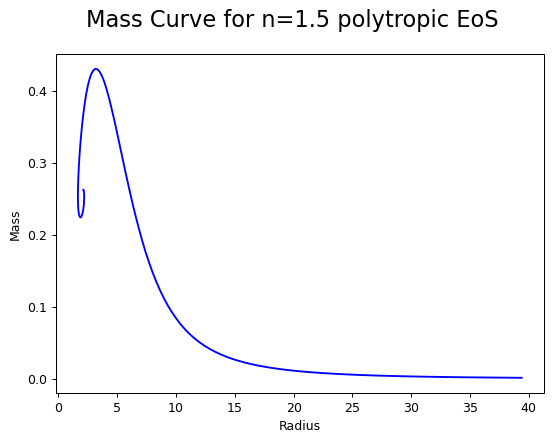

In [9]:
plt.figure(figsize=(7, 5), dpi=90)
plt.plot(R,M,'b')
plt.xlabel('Radius',fontsize=10)
plt.ylabel('Mass',fontsize=10)
plt.suptitle('Mass Curve for n=1.5 polytropic EoS', fontsize=18)